## Jupyter notebook for computing correlation coefficients of Hi-C and A/B compartment replicates

This notebook is the code for generating correlations between replicates of Hi-C (Fig. 2a) and replicates of A/B compartments (Fig. 2b), respectively, in the paper **"Analysis of chromatin organinization and gene expression in T cells identifies functional genes for rheumatoid arthritis"** 
by *Jing Yang, Amanda McGovern, Paul Martin, Kate Duffus, Xiangyu Ge, Peyman Zarrineh, Andrew P Morris, Antony Adamson, Peter Fraser, Magnus Rattray & Stephen Eyre*.

Author : *Jing Yang*  <br />
Date: 01/05/2020 <br />
For any questions about the code, please drop me a line at Jing.Yang@manchester.ac.uk

### load packages

In [3]:
library(reshape2)
library(hicrep)
library(tidyverse)


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.0     ✔ purrr   0.3.4
✔ tibble  3.0.1     ✔ dplyr   0.8.5
✔ tidyr   1.1.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [4]:
times1 <- c(rep(c(0,20,40,60,180,220,240), each=4), rep(c(1200, 1380, 1420, 1440), each=2))


### load AB compartment data for both replicates

In [5]:
T0_rep1 <- read.table('https://personalpages.manchester.ac.uk/staff/jing.yang/Data/HiC/data/Compartment_T0_rep1_40x80kb.PC1.txt', header=F, row.names=1)
T20_rep1 <- read.table('https://personalpages.manchester.ac.uk/staff/jing.yang/Data/HiC/data/Compartment_T20_rep1_40x80kb.PC1.txt', header=F, row.names=1)
T1H_rep1 <- read.table('https://personalpages.manchester.ac.uk/staff/jing.yang/Data/HiC/data/Compartment_T1H_rep1_40x80kb.PC1.txt', header=F, row.names=1)
T4H_rep1 <- read.table('https://personalpages.manchester.ac.uk/staff/jing.yang/Data/HiC/data/Compartment_T4H_rep1_40x80kb.PC1.txt', header=F, row.names=1)
T24H_rep1 <- read.table('https://personalpages.manchester.ac.uk/staff/jing.yang/Data/HiC/data/Compartment_T24H_rep1_40x80kb.PC1.txt', header=F, row.names=1)

In [6]:
T0_rep2 <- read.table('https://personalpages.manchester.ac.uk/staff/jing.yang/Data/HiC/data/Compartment_T0_rep2_40x80kb.PC1.txt', header=F, row.names=1)
T20_rep2 <- read.table('https://personalpages.manchester.ac.uk/staff/jing.yang/Data/HiC/data/Compartment_T20_rep2_40x80kb.PC1.txt', header=F, row.names=1)
T1H_rep2 <- read.table('https://personalpages.manchester.ac.uk/staff/jing.yang/Data/HiC/data/Compartment_T1H_rep2_40x80kb.PC1.txt', header=F, row.names=1)
T4H_rep2 <- read.table('https://personalpages.manchester.ac.uk/staff/jing.yang/Data/HiC/data/Compartment_T4H_rep2_40x80kb.PC1.txt', header=F, row.names=1)

In [7]:
names(T0_rep1) <- c('chr','start','end','strand','T01')
names(T0_rep2) <- c('chr','start','end','strand','T02')
names(T20_rep1) <- c('chr','start','end','strand','T201')
names(T20_rep2) <- c('chr','start','end','strand','T202')
names(T1H_rep1) <- c('chr','start','end','strand','T1H1')
names(T1H_rep2) <- c('chr','start','end','strand','T1H2')
names(T4H_rep1) <- c('chr','start','end','strand','T4H1')
names(T4H_rep2) <- c('chr','start','end','strand','T4H2')
names(T24H_rep1) <- c('chr','start','end','strand','T24H1')


### calculate the correlations between AB compartment data

In [8]:
data_T0 <- merge(T0_rep1, T0_rep2)
data_T20 <- merge(T20_rep1, T20_rep2)
data_T1H <- merge(T1H_rep1, T1H_rep2)
data_T4H <- merge(T4H_rep1, T4H_rep2)
data_T24H <- T24H_rep1


In [9]:
data <- merge(merge(merge(merge(data_T0, data_T20),data_T1H), data_T4H), data_T24H)
data_sorted <- data[with(data, order(chr, start)),]

In [10]:
label1 <- 'Within Replicate 1'
label2 <- 'Within Replicate 2'
label12 <- 'Between Replicates 1&2'

In [10]:
corr0 <- c( cor(data_sorted$T01, data_sorted$T02), cor(data_sorted$T201, data_sorted$T202),
            cor(data_sorted$T1H1, data_sorted$T1H2), cor(data_sorted$T4H1, data_sorted$T4H2))
label0 <- c(label12, label12, label12, label12)
corr20 <- c( cor(data_sorted$T01, data_sorted$T202), cor(data_sorted$T02, data_sorted$T201),
            cor(data_sorted$T01, data_sorted$T201), cor(data_sorted$T02, data_sorted$T202))
label20 <- c(label12, label12, label1, label2)
corr40 <- c( cor(data_sorted$T202, data_sorted$T1H1), cor(data_sorted$T201, data_sorted$T1H2),
            cor(data_sorted$T1H1, data_sorted$T201), cor(data_sorted$T202, data_sorted$T1H2))
label40 <- c(label12, label12, label1, label2)
corr60 <- c( cor(data_sorted$T01, data_sorted$T1H2), cor(data_sorted$T02, data_sorted$T1H2),            
            cor(data_sorted$T01, data_sorted$T1H1), cor(data_sorted$T02, data_sorted$T1H1))
label60 <- c(label12, label2, label1, label12)
corr220 <- c( cor(data_sorted$T201, data_sorted$T4H2), cor(data_sorted$T202, data_sorted$T4H2),
            cor(data_sorted$T201, data_sorted$T4H1), cor(data_sorted$T202, data_sorted$T4H1))
label220 <- c(label12, label2, label1, label12)
corr180 <- c( cor(data_sorted$T1H1, data_sorted$T4H2), cor(data_sorted$T1H2, data_sorted$T4H2),
            cor(data_sorted$T1H1, data_sorted$T4H1), cor(data_sorted$T1H2, data_sorted$T4H1))
label180 <- c(label12, label2, label1, label12)
corr240 <- c( cor(data_sorted$T01, data_sorted$T4H2), cor(data_sorted$T02, data_sorted$T4H2),
            cor(data_sorted$T01, data_sorted$T4H1), cor(data_sorted$T02, data_sorted$T4H1))
label240 <- c(label12, label2, label1, label12)
corr1440 <- c(cor(data_sorted$T01, data_sorted$T24H1), cor(data_sorted$T02, data_sorted$T24H1))
label1440 <- c(label1, label12)
corr1420 <- c(cor(data_sorted$T201, data_sorted$T24H1), cor(data_sorted$T202, data_sorted$T24H1))
label1420 <- c(label1, label12)
corr1380 <- c(cor(data_sorted$T1H1, data_sorted$T24H1), cor(data_sorted$T1H2, data_sorted$T24H1))
label1380 <- c(label1, label12)
corr1200 <- c(cor(data_sorted$T4H1, data_sorted$T24H1), cor(data_sorted$T4H2, data_sorted$T24H1))
label1200 <- c(label1, label12)


In [11]:
data_forplot_AB <- data.frame(x=times1, y=c(corr0, corr20, corr40, corr60, corr180, corr220, corr240, 
                                         corr1200, corr1380, corr1420, corr1440),
                          label=c(label0, label20, label40, label60, label180, label220, label240, 
                                  label1200, label1380, label1420, label1440))
save(data_forplot_AB, file='data/AC_correlation.RData')

### calculate the correlation for HiC data. This step is very slow, I will just use the results I saved before for the plotting

### read data for HiC correlation calculation

In [ ]:
### not run, very slow
T0_rep1_hic <- read.table('https://personalpages.manchester.ac.uk/staff/jing.yang/Data/HiC/data/HiC_T0_40k_rep1_chr1.txt', header=T)
T20_rep1_hic <- read.table('https://personalpages.manchester.ac.uk/staff/jing.yang/Data/HiC/data/HiC_T20_40k_rep1_chr1.txt', header=T)
T1H_rep1_hic <- read.table('https://personalpages.manchester.ac.uk/staff/jing.yang/Data/HiC/data/HiC_T1H_40k_rep1_chr1.txt', header=T)
T4H_rep1_hic <- read.table('https://personalpages.manchester.ac.uk/staff/jing.yang/Data/HiC/data/HiC_T4H_40k_rep1_chr1.txt', header=T)
T24H_rep1_hic <- read.table('https://personalpages.manchester.ac.uk/staff/jing.yang/Data/HiC/data/HiC_T24H_40k_rep1_chr1.txt', header=T)
T0_rep2_hic <- read.table('https://personalpages.manchester.ac.uk/staff/jing.yang/Data/HiC/data/HiC_T0_40k_rep2_chr1.txt', header=T)
T20_rep2_hic <- read.table('https://personalpages.manchester.ac.uk/staff/jing.yang/Data/HiC/data/HiC_T20_40k_rep2_chr1.txt', header=T)
T1H_rep2_hic <- read.table('https://personalpages.manchester.ac.uk/staff/jing.yang/Data/HiC/data/HiC_T1H_40k_rep2_chr1.txt', header=T)
T4H_rep2_hic <- read.table('https://personalpages.manchester.ac.uk/staff/jing.yang/Data/HiC/data/HiC_T4H_40k_rep2_chr1.txt', header=T)



In [ ]:
### not run, very slow
name0 <- data.frame(firstvar = c('T0_rep1', 'T20_rep1', 'T1H_rep1', 'T4H_rep1'),
                   secondvar = c('T0_rep2', 'T20_rep2', 'T1H_rep2', 'T4H_rep2'))
label_hic0 <- c(label12, label12, label12, label12)

name20 <- data.frame(firstvar = c('T0_rep1', 'T0_rep1', 'T0_rep2', 'T0_rep2'),
                  secondvar = c('T20_rep1', 'T20_rep2', 'T20_rep1', 'T20_rep2'))
label20 <- c(label1, label12, label12, label2)

name40 <- data.frame(firstvar = c('T20_rep1','T20_rep1','T20_rep2','T20_rep2'),
               secondvar = c('T1H_rep1', 'T1H_rep2', 'T1H_rep1', 'T1H_rep2'))
label_hic40 <- c(label1, label12, label12, label2)

name60 <- data.frame(firstvar = c('T0_rep1', 'T0_rep1', 'T0_rep2', 'T0_rep2'),
                  secondvar = c('T1H_rep1', 'T1H_rep2', 'T1H_rep1', 'T1H_rep2'))
label_hic60 <- c(label1, label12, label12, label2)

name180 <- data.frame(firstvar=c('T1H_rep1', 'T1H_rep1', 'T1H_rep2', 'T1H_rep2'),
                  secondvar = c('T4H_rep1', 'T4H_rep2', 'T4H_rep1', 'T4H_rep2'))
label_hic180 <- c(label1, label12, label12, label2)

name220 <- data.frame(firstvar=c('T20_rep1', 'T20_rep1', 'T20_rep2', 'T20_rep2'),
                  secondvar = c('T4H_rep1', 'T4H_rep2', 'T4H_rep1', 'T4H_rep2'))
label_hic220 <- c(label1, label12, label12, label2)

name240 <- data.frame(firstvar = c('T0_rep1', 'T0_rep1', 'T0_rep2', 'T0_rep2'),
                  secondvar = c('T4H_rep1', 'T4H_rep2', 'T4H_rep1', 'T4H_rep2'))
label_hic240 <- c(label1, label12, label12, label2)

name1440 <- data.frame(firstvar = c('T0_rep1', 'T0_rep2'),
                    secondvar = c('T24H_rep1', 'T24H_rep1'))
label_hic1440 <- c(label1, label12)

name1420 <- data.frame(firstvar = c('T20_rep1', 'T20_rep2'),
                    secondvar = c('T24H_rep1', 'T24H_rep1'))
label_hic1420 <- c(label1, label12)

name1380 <- data.frame(firstvar = c('T1H_rep1', 'T1H_rep2'),
                    secondvar = c('T24H_rep1', 'T24H_rep1'))
label_hic1380 <- c(label1, label12)

name1200 <- data.frame(firstvar = c('T4H_rep1', 'T4H_rep2'),
                    secondvar = c('T24H_rep1', 'T24H_rep1'))
label_hic1200 <- c(label1, label12)

name0 <- lapply(name0,as.character)
name20 <- lapply(name20,as.character)
name40 <- lapply(name40,as.character)
name60 <- lapply(name60,as.character)
name180 <- lapply(name180,as.character)
name220 <- lapply(name220,as.character)
name240 <- lapply(name240,as.character)
name1440 <- lapply(name1440,as.character)
name1380 <- lapply(name1380,as.character)
name1420 <- lapply(name1420,as.character)
name1200 <- lapply(name1200,as.character)



In [ ]:
### do not run, very slow
h_hat <- 1
corr0_hic <- numeric(0)
for (ii in 1:4) {
  corr_prep <- prep(eval(as.name(name0$firstvar[ii])), eval(as.name(name0$secondvar[ii])), 40000, h_hat, 100000)
  corr0_hic = paste(corr0_hic, get.scc(corr_prep, 40000, 100000)$scc)
  #print(corr0)
}
corr20_hic <- numeric(0)
for (ii in 1:4) {
  corr_prep <- prep(eval(as.name(name20$firstvar[ii])), eval(as.name(name20$secondvar[ii])), 40000, h_hat, 100000)
  corr20_hic = paste(corr20_hic, get.scc(corr_prep, 40000, 100000)$scc)
  #print(corr0)
}
corr40_hic <- numeric(0)
for (ii in 1:4) {
  corr_prep <- prep(eval(as.name(name40$firstvar[ii])), eval(as.name(name40$secondvar[ii])), 40000, h_hat, 100000)
  corr40_hic = paste(corr40_hic, get.scc(corr_prep, 40000, 100000)$scc)
  #print(corr0)
}
corr60_hic <- numeric(0)
for (ii in 1:4) {
  corr_prep <- prep(eval(as.name(name60$firstvar[ii])), eval(as.name(name60$secondvar[ii])), 40000, h_hat, 100000)
  corr60_hic = paste(corr60_hic, get.scc(corr_prep, 40000, 100000)$scc)
  #print(corr0)
}
corr180_hic <- numeric(0)
for (ii in 1:4) {
  corr_prep <- prep(eval(as.name(name180$firstvar[ii])), eval(as.name(name180$secondvar[ii])), 40000, h_hat, 100000)
  corr180_hic = paste(corr180_hic, get.scc(corr_prep, 40000, 100000)$scc)
  #print(corr0)
}
corr220_hic <- numeric(0)
for (ii in 1:4) {
  corr_prep <- prep(eval(as.name(name220$firstvar[ii])), eval(as.name(name220$secondvar[ii])), 40000, h_hat, 100000)
  corr220_hic = paste(corr220_hic, get.scc(corr_prep, 40000, 100000)$scc)
  #print(corr0)
}
corr240_hic <- numeric(0)
for (ii in 1:4) {
  corr_prep <- prep(eval(as.name(name240$firstvar[ii])), eval(as.name(name240$secondvar[ii])), 40000, h_hat, 100000)
  corr240_hic = paste(corr240_hic, get.scc(corr_prep, 40000, 100000)$scc)
  #print(corr0)
}
corr1200_hic <- numeric(0)
for (ii in 1:2) {
  corr_prep <- prep(eval(as.name(name1200$firstvar[ii])), eval(as.name(name1200$secondvar[ii])), 40000, h_hat, 100000)
  corr1200_hic = paste(corr1200_hic, get.scc(corr_prep, 40000, 100000)$scc)
  #print(corr0)
}
corr1380_hic <- numeric(0)
for (ii in 1:2) {
  corr_prep <- prep(eval(as.name(name1380$firstvar[ii])), eval(as.name(name1380$secondvar[ii])), 40000, h_hat, 100000)
  corr1380_hic = paste(corr1380_hic, get.scc(corr_prep, 40000, 100000)$scc)
  #print(corr0)
}
corr1420_hic <- numeric(0)
for (ii in 1:2) {
  corr_prep <- prep(eval(as.name(name1420$firstvar[ii])), eval(as.name(name1420$secondvar[ii])), 40000, h_hat, 100000)
  corr1420_hic = paste(corr1420_hic, get.scc(corr_prep, 40000, 100000)$scc)
  #print(corr0)
}
corr1440_hic <- numeric(0)
for (ii in 1:2) {
  corr_prep <- prep(eval(as.name(name1440$firstvar[ii])), eval(as.name(name1440$secondvar[ii])), 40000, h_hat, 100000)
  corr1440_hic = paste(corr1440_hic, get.scc(corr_prep, 40000, 100000)$scc)
  #print(corr0)
}
data_forplot_hic <- data.frame(x=times1, y=c(corr0_hic, corr20_hic, corr40_hic, corr60_hic, corr180_hic, 
                                         corr220_hic, corr240_hic, corr1200_hic, corr1380_hic, corr1420_hic, corr1440_hic),
                          label=c(label_hic0, label20, label_hic40, label_hic60, label_hic180, label_hic220, label_hic240, 
                                  label_hic1200, label_hic1380, label_hic1420, label_hic1440))
save(data_forplot_hic,file='data/HiC_correlation_hhat1.RData')


In [12]:
load('data/HiC_correlation_hhat1.RData')
load('data/AB_correlation.RData')

In [13]:
data_forplot_AB$category <- 'A/B compartment'
data_forplot_hic$category <- 'Hi-C'
data_forplot <- rbind(data_forplot_AB, data_forplot_hic)
data_forplot$category <- factor(data_forplot$category, levels=c('Hi-C','A/B compartment'))

`geom_smooth()` using formula 'y ~ x'



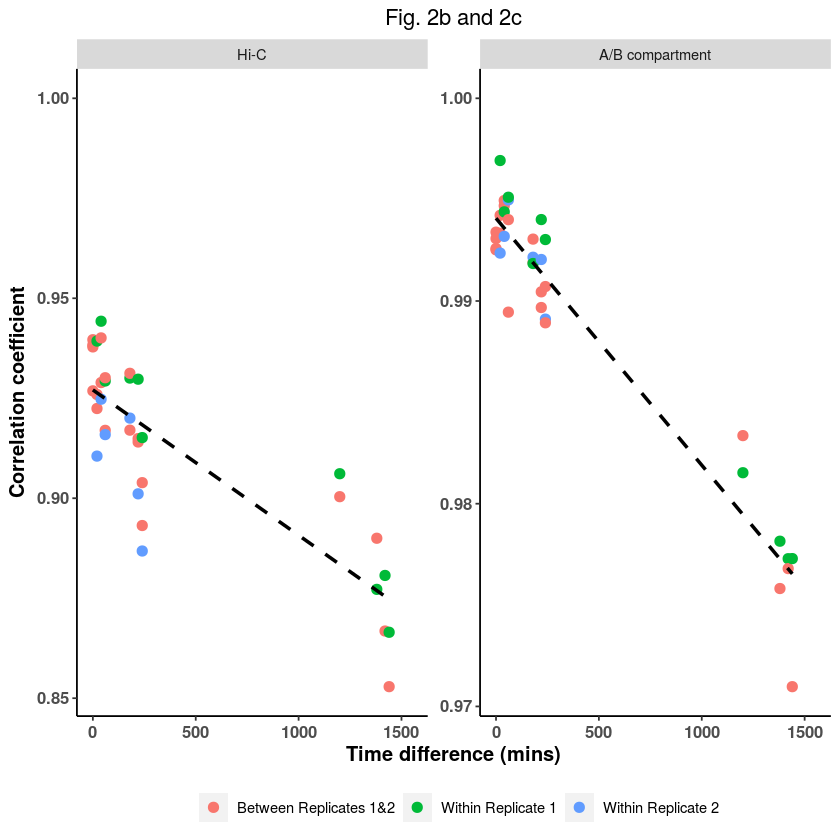

In [14]:
ggplot(data_forplot, aes(x=x, y=y)) + geom_point(aes(color=label), size=2.5) + 
geom_smooth(method="glm", color='black', se=FALSE, linetype='dashed') +
xlab('Time difference (mins)') + ylab('Correlation coefficient') + 
#ggtitle('Correlations between A/B compartment (Fig. 2c)') +
#scale_color_brewer('Set4') +
scale_y_continuous(limits=c(NA,1))+ xlim(c(NA,1550)) +
theme(
  panel.grid.major = element_blank(),
  panel.grid.minor = element_blank(),
  panel.background = element_blank(),
  plot.title = element_text(hjust=0.5),
  legend.title=element_blank(), legend.position='bottom',
  axis.title=element_text(size=12,face="bold", hjust=0.5),
  axis.text.x = element_text(hjust = 0.5, vjust=0.5, size=10, face="bold"),
  axis.text.y = element_text(size=10, face="bold"),
  axis.line = element_line(colour = "black"))  + guides(fill=guide_legend(label.hjust=0.5)) + 
  ggtitle('Fig. 2b and 2c') + facet_wrap(category~., scales='free_y')

